# Matrices



In [1]:
import os
import numpy
import pandas
import cv2

#List of usable patients 
data_ID=pandas.read_csv(os.path.join('..','List_Patient_HEGP.csv'),sep=",")

CD3PATH=os.path.join('..','Data_output','cache_HEGP','cd3','PAR170')
img_cd3_im=pandas.read_csv(os.path.join(CD3PATH,'Ratio_Cells_per_InvasiveFront'),sep=' ',header=None)
img_cd3_ct=pandas.read_csv(os.path.join(CD3PATH,'Ratio_Cells_per_Tumor'),sep=' ',header=None)


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 432x288 with 0 Axes>

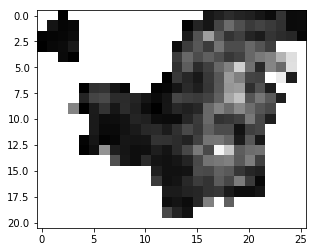

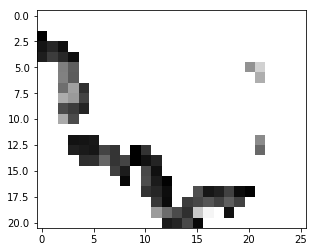

In [2]:
from matplotlib import pyplot as plt
plt.gray()
plt.show()
plt.imshow(img_cd3_ct, interpolation='nearest')

plt.gray()
plt.show()
plt.imshow(img_cd3_im, interpolation='nearest')


## Extraction de features



In [4]:
sift = cv2.xfeatures2d.SIFT_create()



In [5]:
size_vector_cd3=pandas.DataFrame(data=data_ID['OfficialID'])
size_vector_cd3["Size_Tumor_kp"]=numpy.nan
size_vector_cd3["Size_Tumor_des"]=numpy.nan
size_vector_cd3["Size_IM_kp"]=numpy.nan
size_vector_cd3["Size_IM_des"]=numpy.nan
size_vector_cd3["Size_img_h"]=numpy.nan
size_vector_cd3["Size_img_w"]=numpy.nan
size_vector_cd3["Size_img"]=numpy.nan
size_vector_cd3.set_index('OfficialID',drop=False,inplace=True)

size_vector_cd8=pandas.DataFrame(data=data_ID['OfficialID'])
size_vector_cd8["Size_Tumor_kp"]=numpy.nan
size_vector_cd8["Size_Tumor_des"]=numpy.nan
size_vector_cd8["Size_IM_kp"]=numpy.nan
size_vector_cd8["Size_IM_des"]=numpy.nan
size_vector_cd8["Size_img_h"]=numpy.nan
size_vector_cd8["Size_img_w"]=numpy.nan
size_vector_cd8["Size_img"]=numpy.nan
size_vector_cd8.set_index('OfficialID',drop=False,inplace=True)


for patient_id in data_ID['OfficialID']:
    CD3PATH=os.path.join('..','Data_output','cache_HEGP','cd3',patient_id)
    img_cd3=pandas.read_csv(os.path.join(CD3PATH,'Ratio_Cells_per_Tumor'),sep=' ',header=None)
    size_vector_cd3.loc[patient_id,'Size_img_h']=img_cd3.shape[0]
    size_vector_cd3.loc[patient_id,'Size_img_w']=img_cd3.shape[1]
    size_vector_cd3.loc[patient_id,'Size_img']=img_cd3.size
    gen = numpy.array(img_cd3 ,dtype=numpy.uint8)
    
    #kps=extract_features(gen)
    kp, des = sift.detectAndCompute(gen,None)
    try:
        size_vector_cd3.loc[patient_id,'Size_Tumor_kp']=des.shape[0]
        size_vector_cd3.loc[patient_id,'Size_Tumor_des']=des.shape[1]
    except (AttributeError):
        pass
    img_cd3=pandas.read_csv(os.path.join(CD3PATH,'Ratio_Cells_per_InvasiveFront'),sep=' ',header=None)
    gen = numpy.array(img_cd3 ,dtype=numpy.uint8)
    #kps=extract_features(gen)
    kp, des = sift.detectAndCompute(gen,None)
    try:
        size_vector_cd3.loc[patient_id,'Size_IM_kp']=des.shape[0]
        size_vector_cd3.loc[patient_id,'Size_IM_des']=des.shape[1]
    except (AttributeError):
        pass
    CD8PATH=os.path.join('..','Data_output','cache_HEGP','cd8',patient_id)
    img_cd8=pandas.read_csv(os.path.join(CD8PATH,'Ratio_Cells_per_Tumor'),sep=' ',header=None)
    size_vector_cd8.loc[patient_id,'Size_img_h']=img_cd8.shape[0]
    size_vector_cd8.loc[patient_id,'Size_img_w']=img_cd8.shape[1]
    size_vector_cd8.loc[patient_id,'Size_img']=img_cd8.size
    gen = numpy.array(img_cd8 ,dtype=numpy.uint8)
    
    #kps=extract_features(gen)
    kp, des = sift.detectAndCompute(gen,None)
    try:
        size_vector_cd8.loc[patient_id,'Size_Tumor_kp']=des.shape[0]
        size_vector_cd8.loc[patient_id,'Size_Tumor_des']=des.shape[1]
    except (AttributeError):
        pass
    img_cd8=pandas.read_csv(os.path.join(CD8PATH,'Ratio_Cells_per_InvasiveFront'),sep=' ',header=None)
    gen = numpy.array(img_cd8 ,dtype=numpy.uint8)
    #kps=extract_features(gen)
    kp, des = sift.detectAndCompute(gen,None)
    try:
        size_vector_cd8.loc[patient_id,'Size_IM_kp']=des.shape[0]
        size_vector_cd8.loc[patient_id,'Size_IM_des']=des.shape[1]
    except (AttributeError):
        pass

In [6]:
len( pandas.isnull(size_vector_cd8).any(1).nonzero()[0])

165

In [7]:
len( pandas.isnull(size_vector_cd3).any(1).nonzero()[0])

127

Beacoup de vecteur vide car les images IM sont très petites et donc l'algorithme ne peut isoler de Keypoints (point important)

Mais si on ne regarde que les tissus tumoraux